In [9]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [10]:
hists={}
pd = []
year = '2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]


pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

ValueError: Cannot add this histogram with histogram <Hist (dataset,region,selection,CaloMinusPfOverRecoil) instance at 0x12948f390> of dissimilar dimensions

In [6]:
data_hists={}

for filename in os.listdir(dirname):
    if 'MET' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [7]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("pdataset",)
process_map = OrderedDict()

#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Zjets"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
#process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)
#process_map["Znunu"] = ("ZJets*",)

data_map = OrderedDict()
data_map["Data"] = ("MET*", )
data_cats = ("dataset",)
for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

print(hists['recoil'].identifiers('process'))

KeyError: 'No axis pdataset found in <Hist (dataset,sumw) instance at 0x129107908>'

In [8]:
for p in hists['recoil'].identifiers('process'):
    print(p,hists['recoil'].project('process', pdi).values(overflow='all')[()][1])

KeyError: 'No axis process found in <Hist (dataset,region,recoil) instance at 0x1290f7c50>'

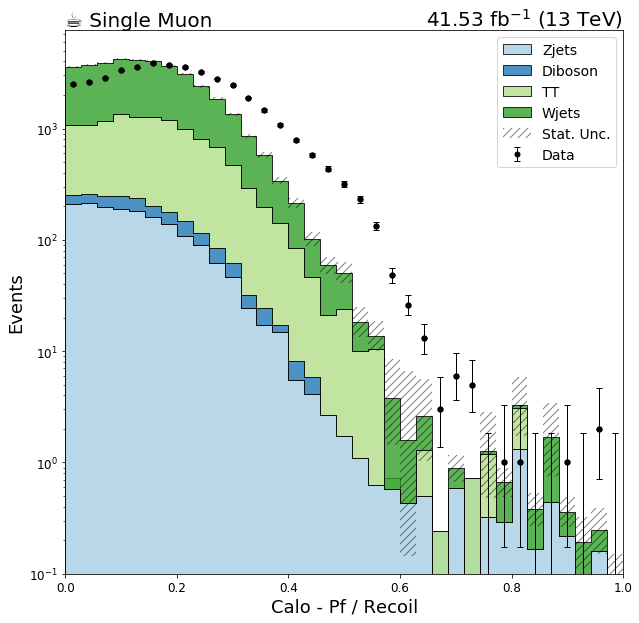

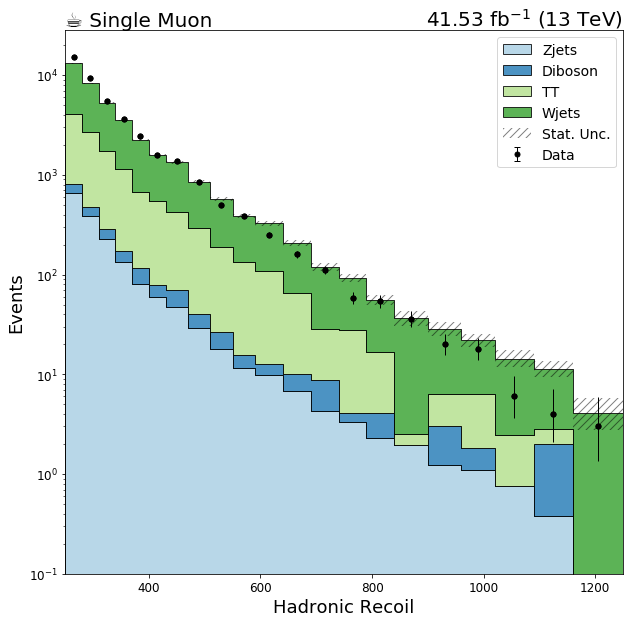

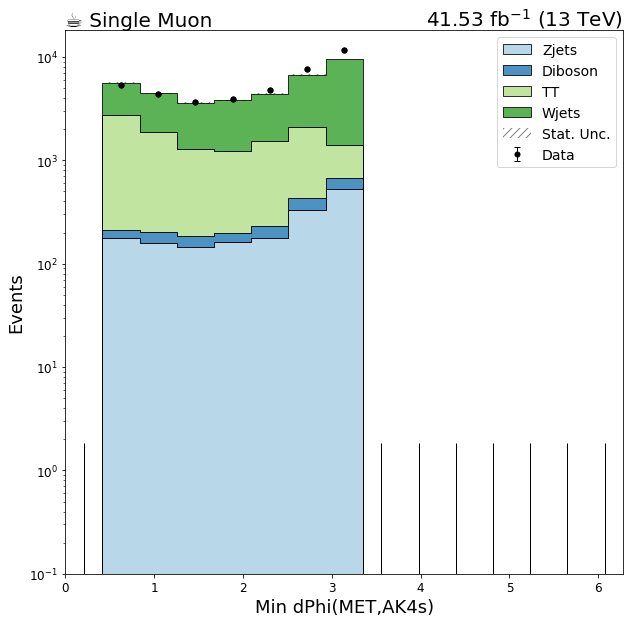

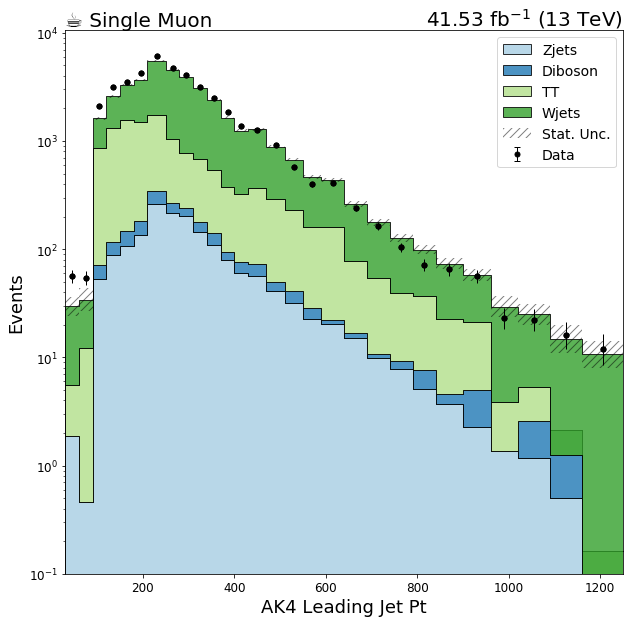

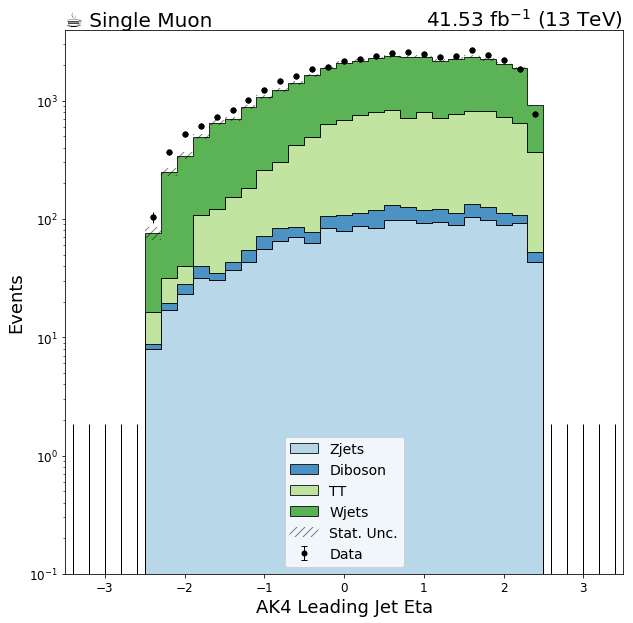

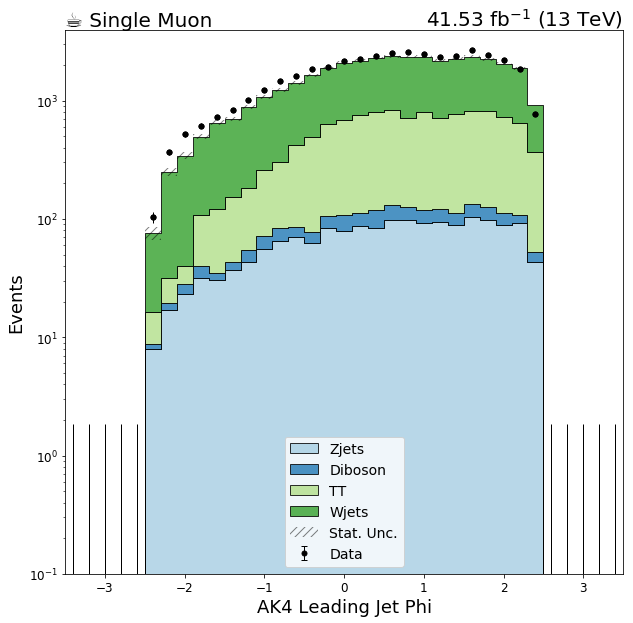

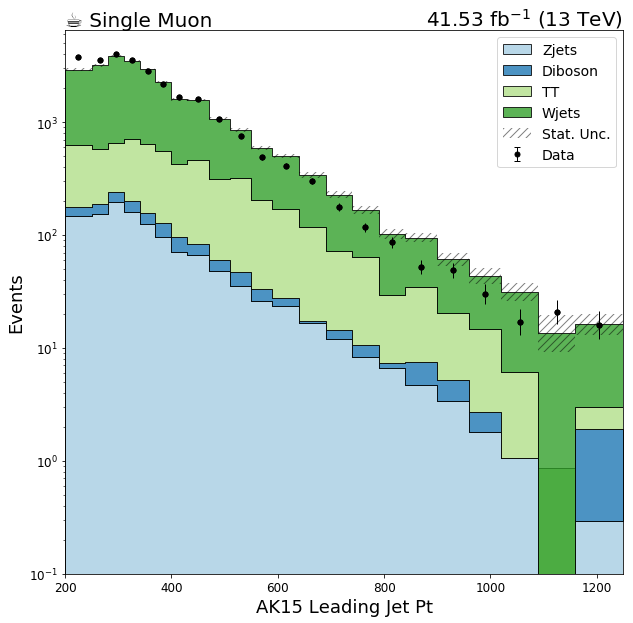

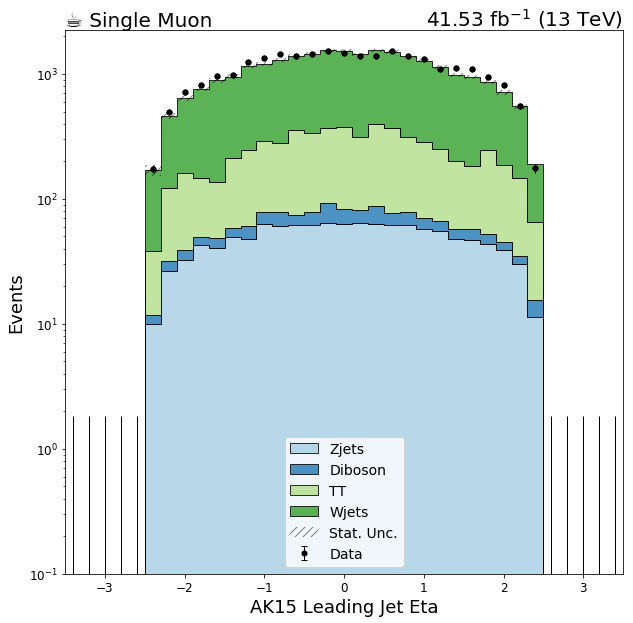

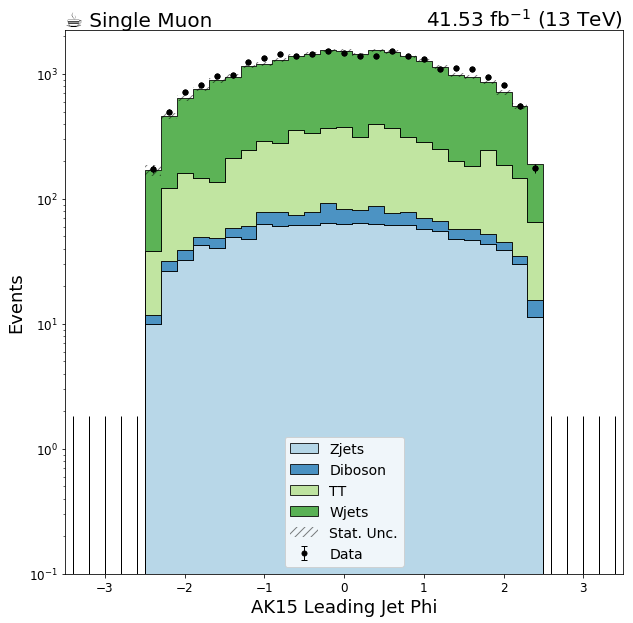

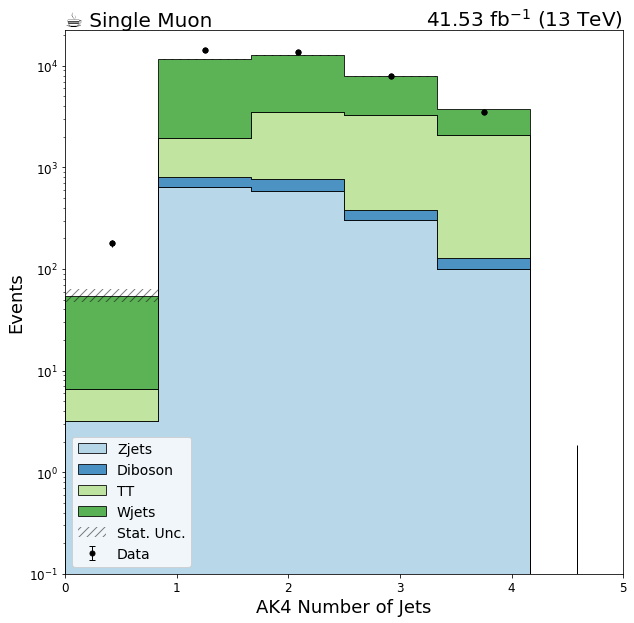

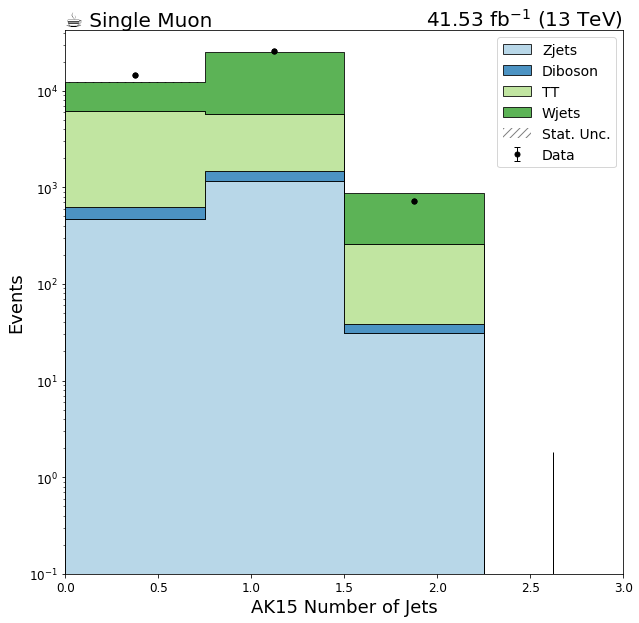

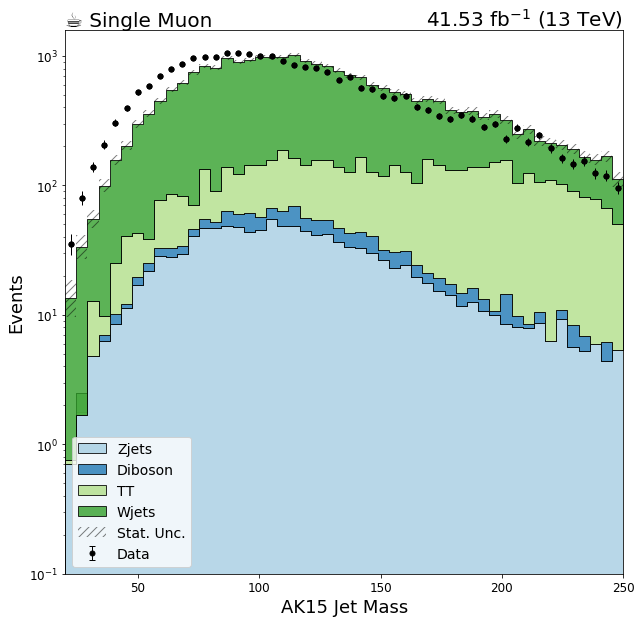

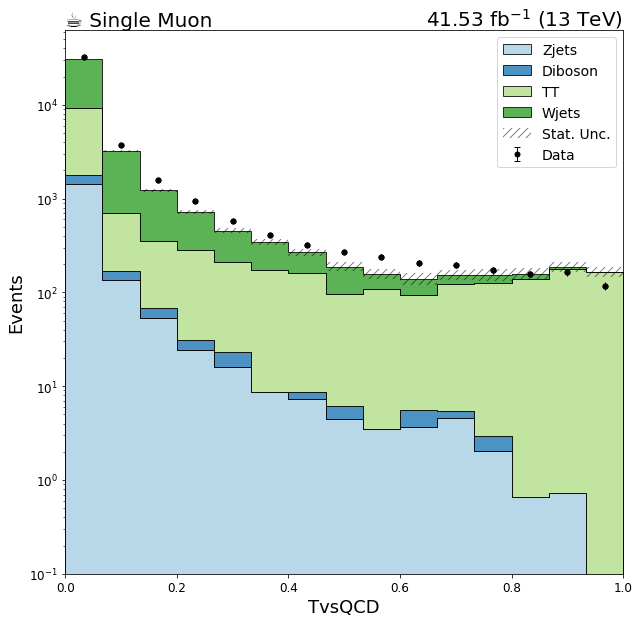

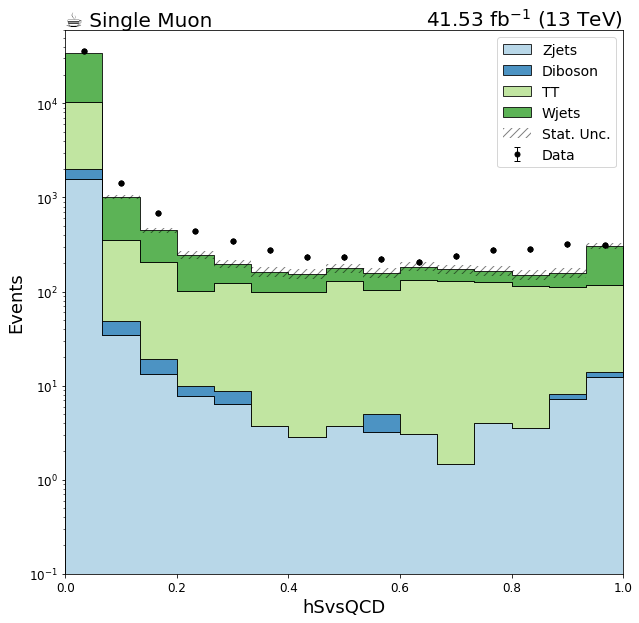

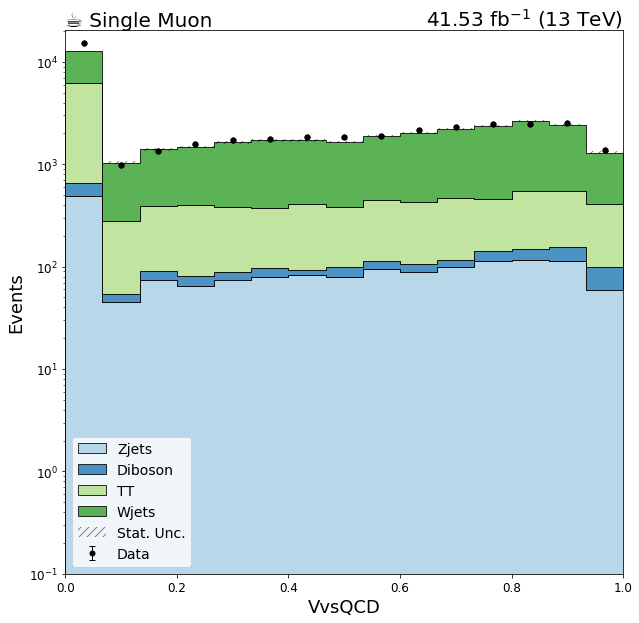

In [10]:
from cycler import cycler

plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']


for key in hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    plot.plot1d(data_hists[key].project('region','isoneM'),
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
           )

    plot.plot1d(hists[key].project('region','isoneM'), ax=ax, overlay="process", clear=False, stack=True, line_opts=None, fill_opts=fill_opts, error_opts=error_opts)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Single Muon", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"41.53 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

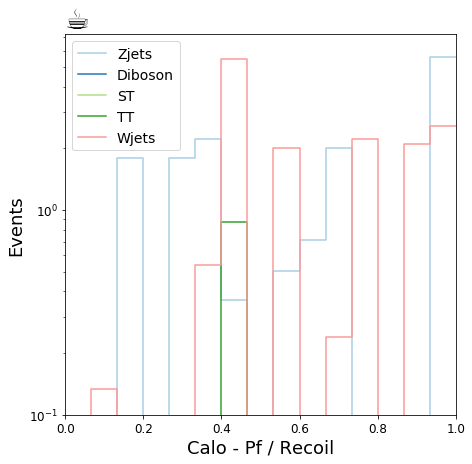

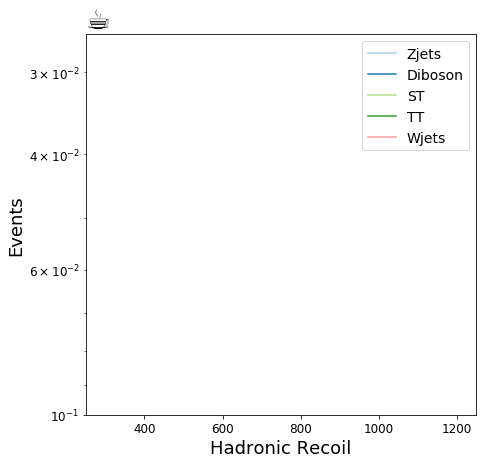

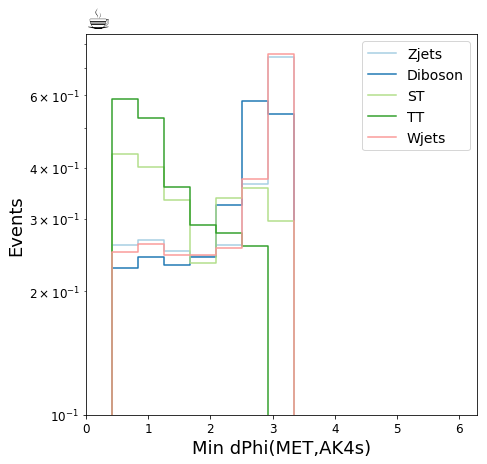

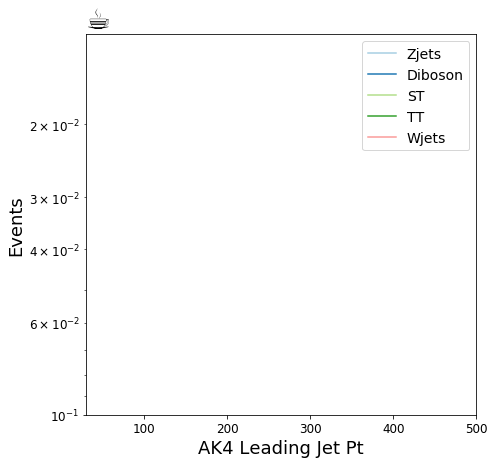

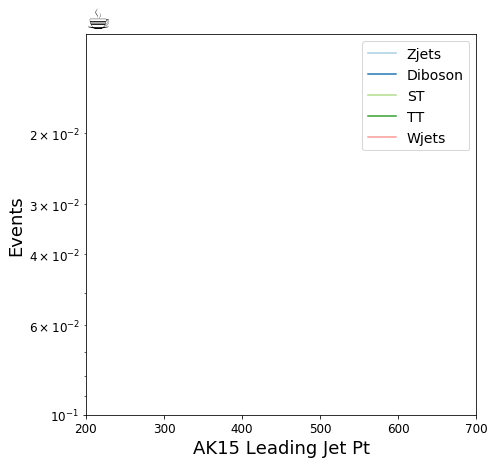

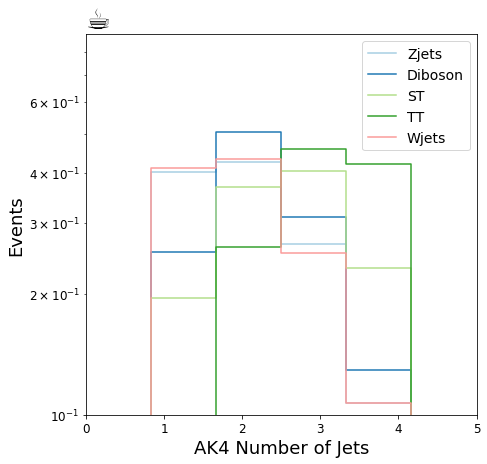

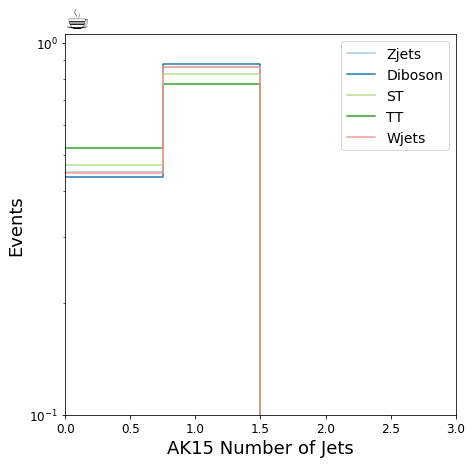

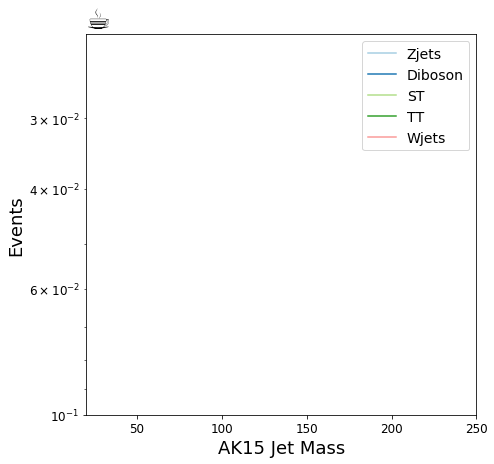

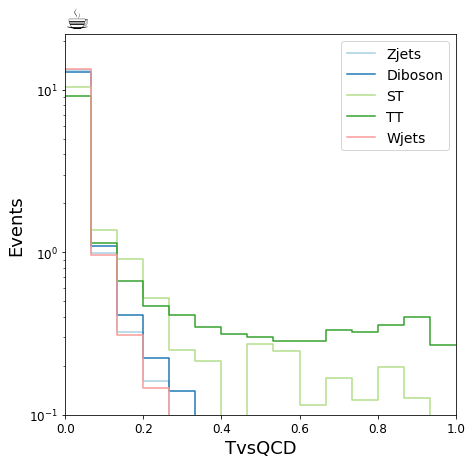

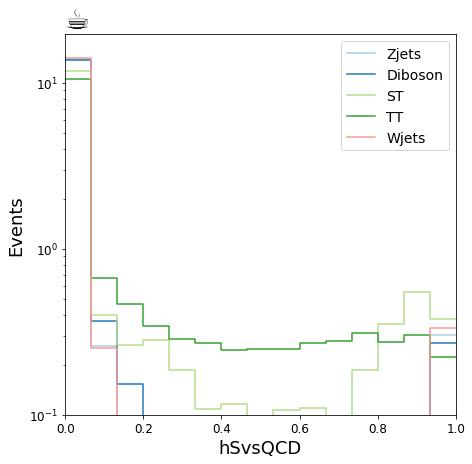

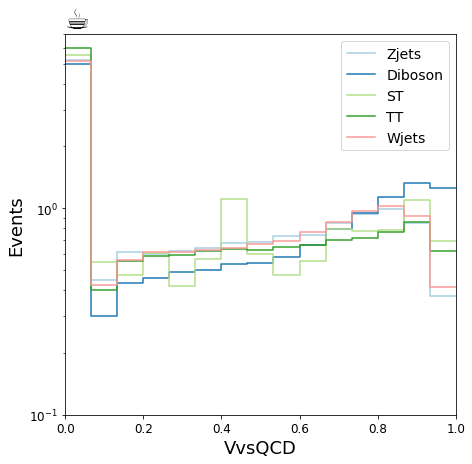

In [6]:
for key in hists.keys():
    if key=='sumw': continue

    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

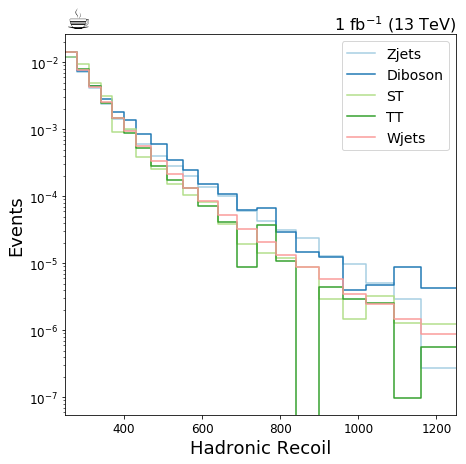

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_prop_cycle(cycler(color=colors))
plot.plot1d(hists["recoil"].project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)